---

### **Project Objective**
The primary objective of this project is to analyze customer behavior and predict churn in a telecom company. This involves:  
1. **Exploratory Data Analysis (EDA):**  
   - Identifying key trends, correlations, and patterns in customer demographics, service usage, and revenue data.  
   - Understanding the characteristics of churned vs. active customers.  

2. **Predictive Modeling:**  
   - Building a machine learning model to accurately predict customer churn based on their attributes and usage patterns.  

3. **Data Visualization:**  
   - Creating insightful Power BI dashboards to showcase customer churn metrics, service utilization, and revenue impact.  

4. **Insights Generation:**  
   - Providing actionable insights to reduce churn and enhance customer retention strategies.

---


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Customer_Data.csv")

In [ ]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.shape

(6418, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [ ]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
(df.isnull().sum()/ len(df))*100

,0
Customer_ID,0.000000
Gender,0.000000
Age,0.000000
Married,0.000000
State,0.000000
Number_of_Referrals,0.000000
Tenure_in_Months,0.000000
Value_Deal,55.282019
Phone_Service,0.000000
Multiple_Lines,9.691493


In [ ]:
col = ['Internet_Type','Online_Security', 'Online_Backup',
                        'Device_Protection_Plan','Premium_Support', 'Streaming_TV', 'Streaming_Movies',
                        'Streaming_Music', 'Unlimited_Data']

In [ ]:
for i in col:
  print(df[i].value_counts())
  print(" ")
  print("---------")

Internet_Type
Fiber Optic    2764
DSL            1502
Cable           762
Name: count, dtype: int64
 
---------
Online_Security
No     3204
Yes    1824
Name: count, dtype: int64
 
---------
Online_Backup
No     2820
Yes    2208
Name: count, dtype: int64
 
---------
Device_Protection_Plan
No     2817
Yes    2211
Name: count, dtype: int64
 
---------
Premium_Support
No     3172
Yes    1856
Name: count, dtype: int64
 
---------
Streaming_TV
No     2556
Yes    2472
Name: count, dtype: int64
 
---------
Streaming_Movies
No     2520
Yes    2508
Name: count, dtype: int64
 
---------
Streaming_Music
No     2766
Yes    2262
Name: count, dtype: int64
 
---------
Unlimited_Data
Yes    4334
No      694
Name: count, dtype: int64
 
---------


In [ ]:
df['Internet_Type'].value_counts()

,count
Internet_Type,
Fiber Optic,2764
DSL,1502
Cable,762


<Axes: >

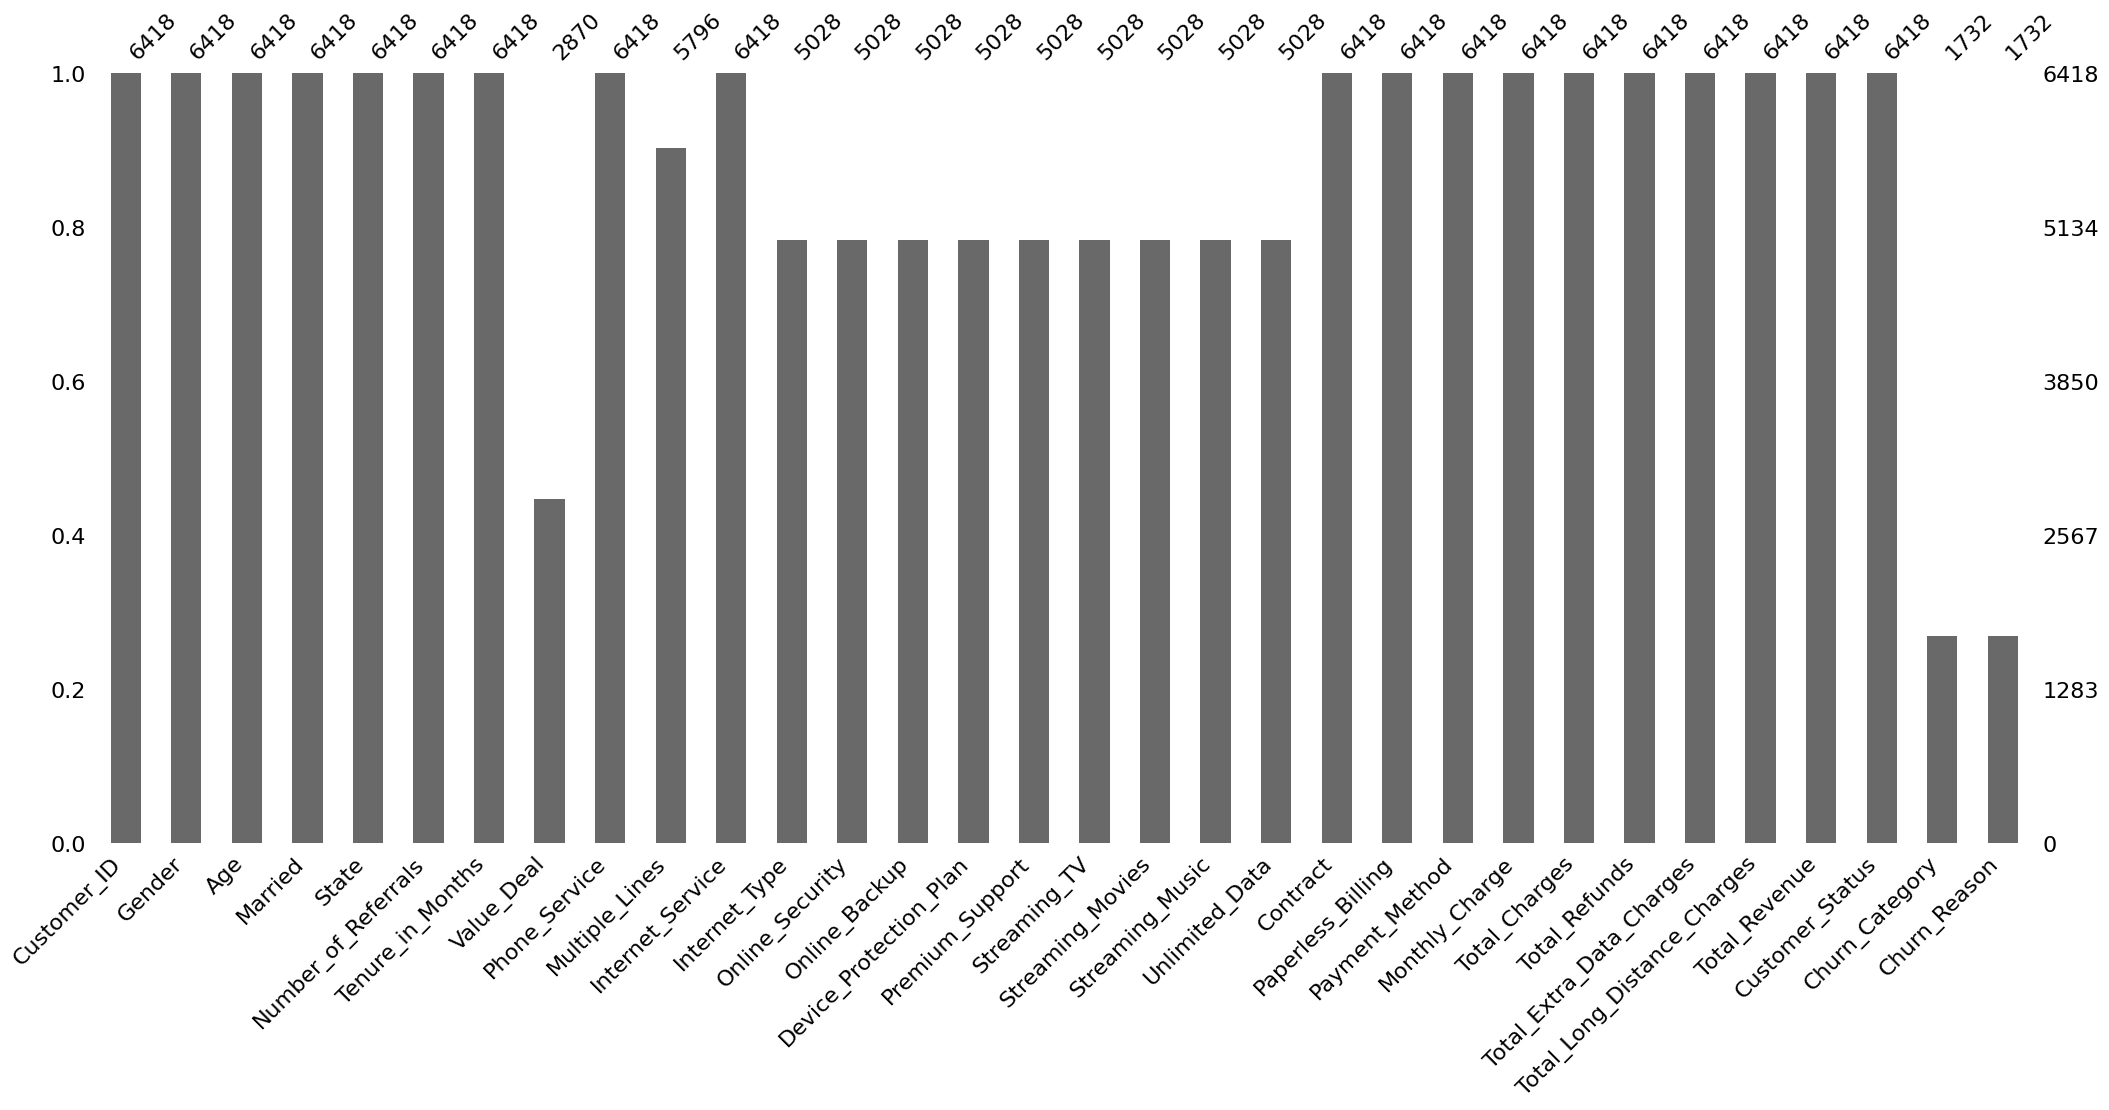

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.duplicated().sum()

0

---

### **Numerical Columns**
1. **Age**: Customer's age in years (18–85).  
2. **Number_of_Referrals**: Number of customer referrals (0–15).  
3. **Tenure_in_Months**: Customer's tenure with the telecom in months (1–36).  
4. **Monthly_Charge**: Monthly charges incurred by the customer. Negative values are invalid (range: -10.0 to 118.75).  
5. **Total_Charges**: Total charges accumulated by the customer (18.80–8684.80).  
6. **Total_Refunds**: Total refunds received by the customer (0.00–49.79).  
7. **Total_Extra_Data_Charges**: Charges for additional data usage (0.00–150.00).  
8. **Total_Long_Distance_Charges**: Charges for long-distance calls (0.00–3564.72).  
9. **Total_Revenue**: Total revenue generated from the customer (21.36–11,979.34).  

---

### **Categorical Columns**
1. **Customer_ID**: Unique identifier for each customer.  
2. **Gender**: Gender of the customer (Male/Female).  
3. **Married**: Marital status of the customer (Yes/No).  
4. **State**: State where the customer resides.  
5. **Value_Deal**: Indicates if the customer availed a value deal. Missing for many entries.  
6. **Phone_Service**: Whether the customer has phone service (Yes/No).  
7. **Multiple_Lines**: Indicates if the customer has multiple phone lines (Yes/No/No Service).  
8. **Internet_Service**: Type of internet service used (DSL/Fiber Optic/None).  
9. **Internet_Type**: Specific type of internet service. Missing for many entries.  
10. **Online_Security**: Availability of online security services (Yes/No).  
11. **Online_Backup**: Indicates if the customer uses online backup (Yes/No).  
12. **Device_Protection_Plan**: Availability of device protection plan (Yes/No).  
13. **Premium_Support**: Whether premium support is availed (Yes/No).  
14. **Streaming_TV**: Whether streaming TV services are availed (Yes/No).  
15. **Streaming_Movies**: Indicates if streaming movies is enabled (Yes/No).  
16. **Streaming_Music**: Indicates if streaming music is availed (Yes/No).  
17. **Unlimited_Data**: Availability of unlimited data plan (Yes/No).  
18. **Contract**: Type of contract (Month-to-Month/One Year/Two Year).  
19. **Paperless_Billing**: Indicates if paperless billing is used (Yes/No).  
20. **Payment_Method**: Customer's payment method (e.g., Bank Transfer, Credit Card).  
21. **Customer_Status**: Status of the customer (Active/Inactive).  
22. **Churn_Category**: Category of churn (missing for most active customers).  
23. **Churn_Reason**: Reason for churn (only available for churned customers).  

---

---

### **Insights from Data Exploration**

#### **General Dataset Overview**
1. The dataset contains **6418 rows** and **32 columns**, including customer demographics, service details, billing information, and churn status.
2. The target variables for churn prediction are:
   - **Customer_Status**: Indicates if the customer is active or inactive.
   - **Churn_Category** and **Churn_Reason**: Available only for churned customers, providing detailed churn analysis.

---

### **Key Observations from Numerical Features**

1. **Age Distribution**  
   - The customer age ranges from **18 to 85 years**, with an average age of **47 years**.  
   - The majority of customers fall within the **33–60 age range**, suggesting a mid-life customer base.  

2. **Tenure Analysis**  
   - The average tenure is approximately **17 months**, with a maximum of **36 months**.  
   - Many customers have a tenure less than **16 months**, indicating a shorter customer lifecycle.  
   - Potential insight: Customers with lower tenure might be more likely to churn.  

3. **Monthly Charge Observations (₹)**  
   - Monthly charges range from **₹-10.00** (invalid) to **₹118.75**, with an average of **₹63.65**.  
   - Negative values suggest data errors and need cleaning or imputation.  
   - Higher charges may indicate customers using premium services, which could impact churn behavior.  

4. **Total Charges and Revenue Trends (₹)**  
   - The total charges range from **₹18.80 to ₹8684.80**, with a median of **₹1396.13**.  
   - Revenue is highly variable, with a mean of **₹3033.87** and a standard deviation of over **₹2866.50**, suggesting diverse customer value segments.  
   - Potential insight: High-revenue customers may be prioritized for retention efforts.  

5. **Refund Patterns (₹)**  
   - Most customers (75%) do not receive refunds, as shown by a median and 75th percentile of **₹0** for `Total_Refunds`.  
   - A small subset has received refunds up to **₹49.79**, which might correlate with dissatisfaction or churn reasons.  

6. **Extra Data and Long-Distance Charges (₹)**  
   - A majority of customers incur no extra data charges, as the median and 75th percentile for `Total_Extra_Data_Charges` are **₹0**.  
   - A few customers, however, have incurred significant charges up to **₹150**, possibly influencing churn.  
   - Long-distance charges are also minimal for most but show some outliers with charges as high as **₹3564.72**.  

---

### **Key Observations from Categorical Features**

1. **Key Categorical Features and Churn**  
   - Preliminary observations suggest that service-related features like `Contract`, `Internet_Service`, `Streaming_TV`, and `Paperless_Billing` are likely to have a strong association with churn.  

2. **Churn-Specific Data**  
   - Only 1732 rows (~27%) contain information about `Churn_Category` and `Churn_Reason`.  
   - This implies that the majority of customers are active, and churn-specific insights can only be derived from this subset.

---

In [ ]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

Numeric Columns

In [ ]:
numeric_columns= ['Age','Number_of_Referrals', 'Tenure_in_Months','Monthly_Charge',
                  'Total_Charges', 'Total_Refunds','Total_Extra_Data_Charges',
                  'Total_Long_Distance_Charges',
                  'Total_Revenue']

Categorical Columns

In [ ]:
categorical_columns = ['Gender','Married', 'State','Value_Deal','Phone_Service', 'Multiple_Lines',
                        'Internet_Service', 'Internet_Type','Online_Security', 'Online_Backup',
                        'Device_Protection_Plan','Premium_Support', 'Streaming_TV', 'Streaming_Movies',
                        'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
                        'Payment_Method','Customer_Status', 'Churn_Category', 'Churn_Reason']

# **Univariate Analysis (Exploring Individual Features)**

# Numerical Features

In [ ]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#81c784", "#388e3c"])

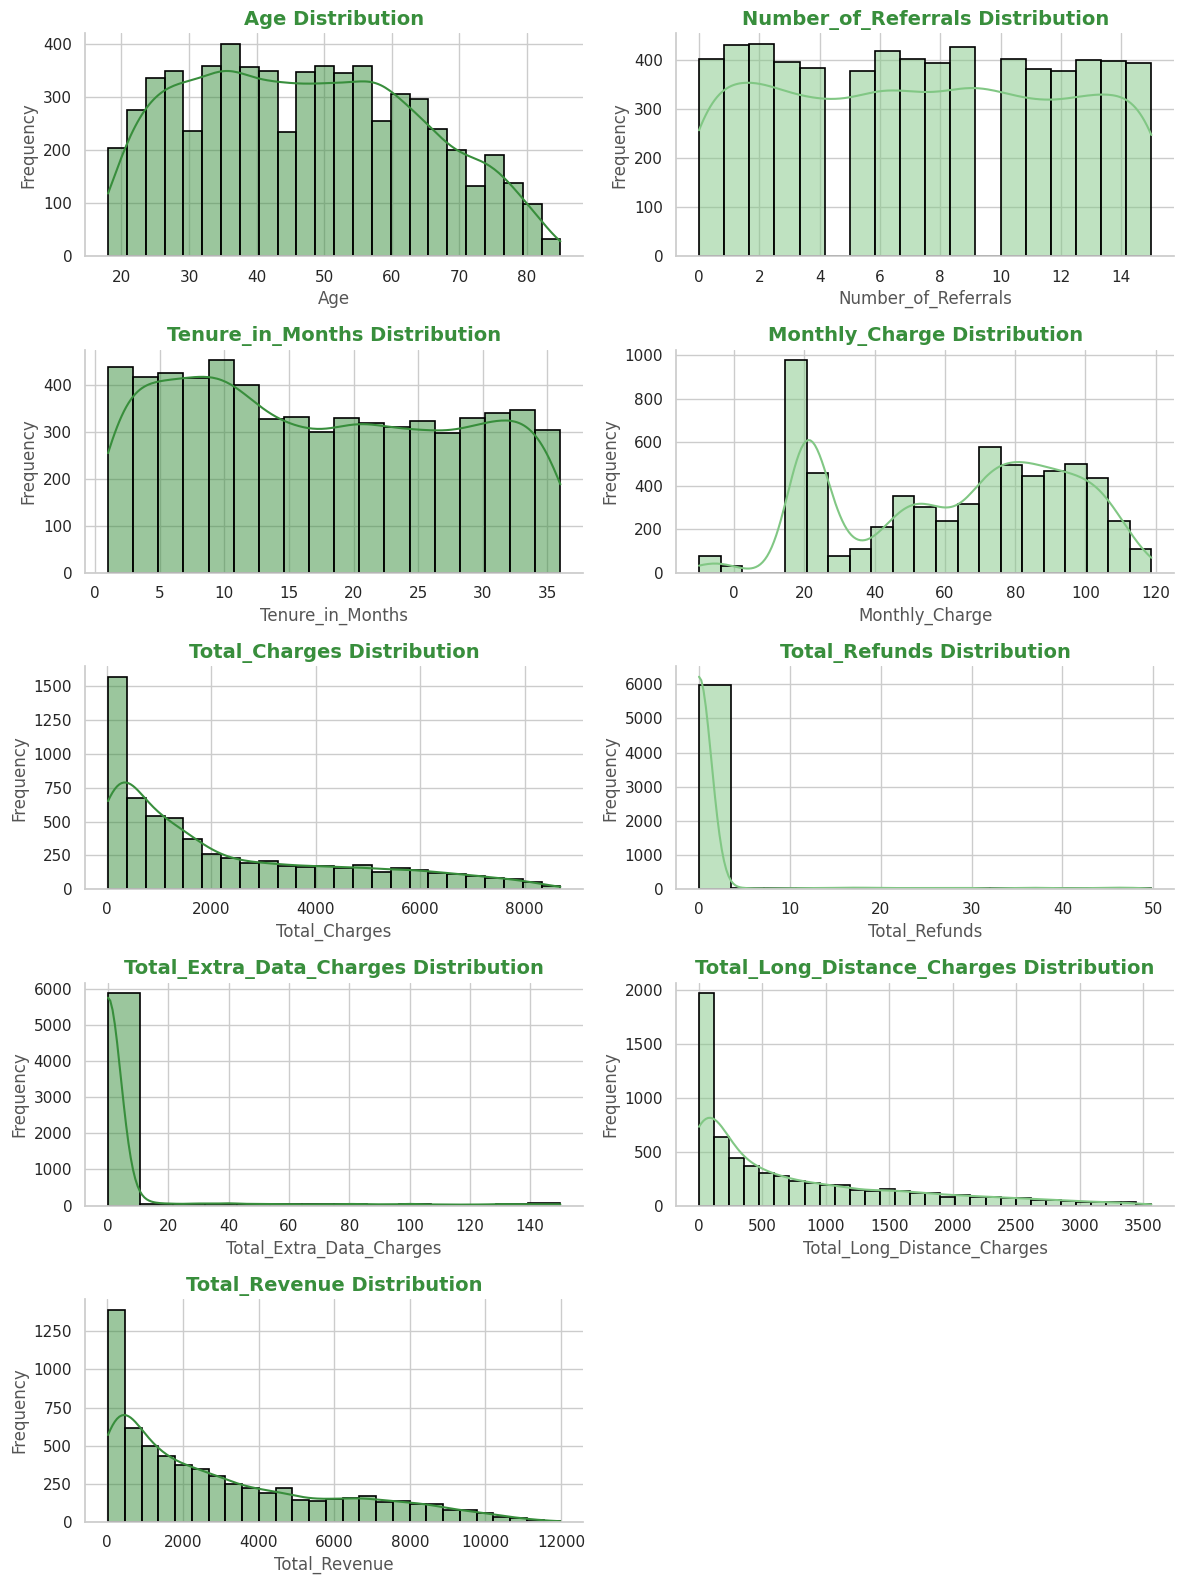

In [ ]:
# Histograms for Numerical Features
plt.figure(figsize=(12, 16))

for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, idx)
    sns.histplot(df[col], kde=True, color=custom_palette[idx % 2], edgecolor="black", linewidth=1.2)

    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#388e3c")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")

    sns.despine()

plt.tight_layout()
plt.show()

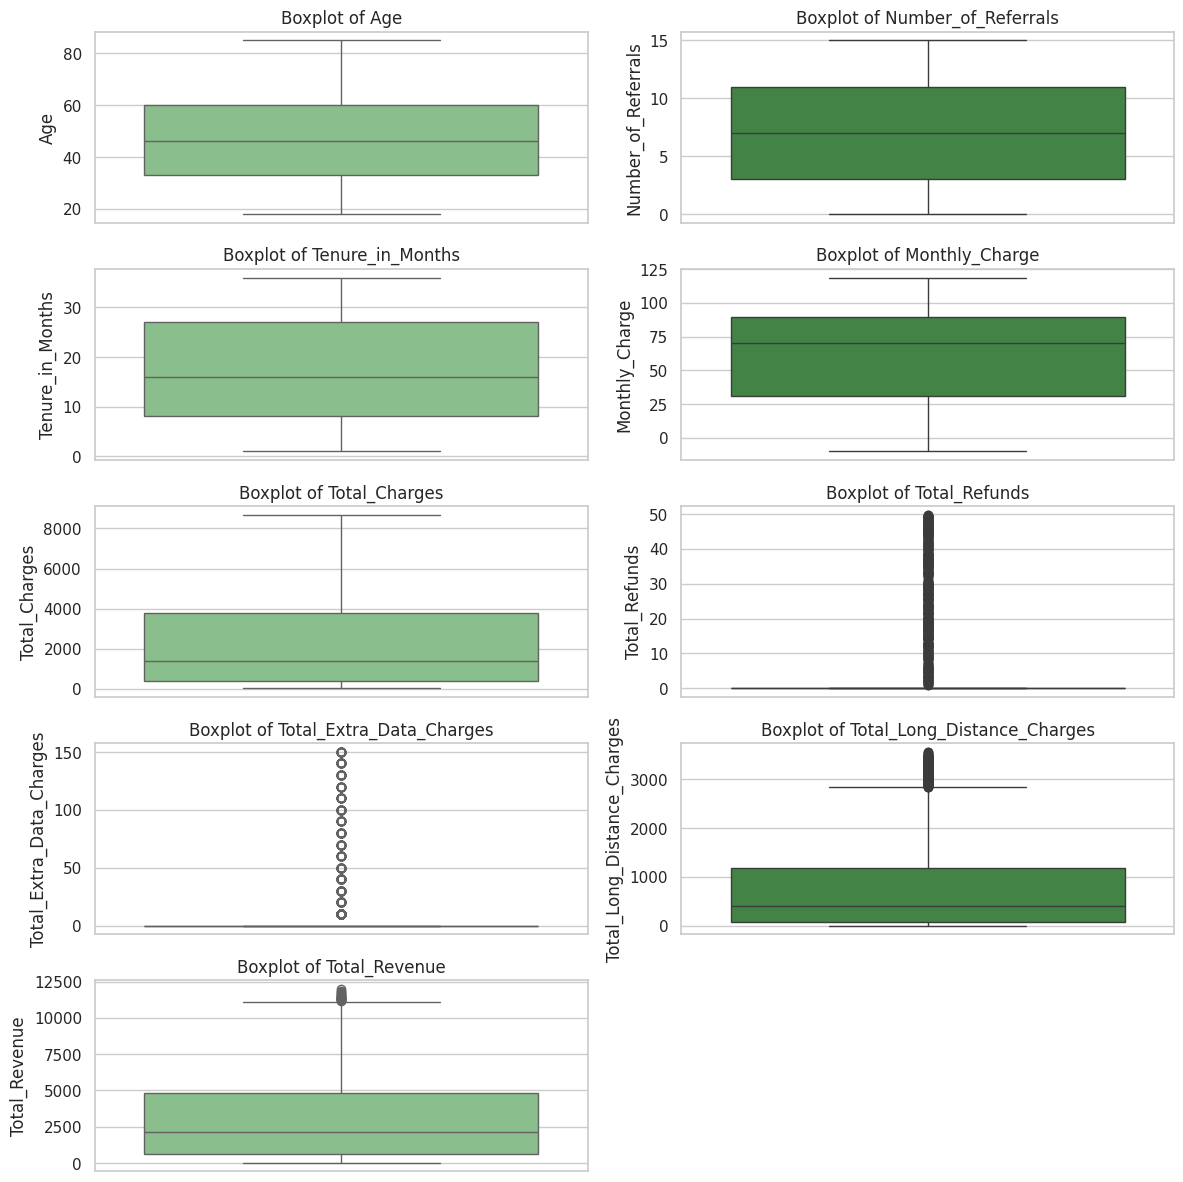

In [ ]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 12))
    for i, col in enumerate(columns):
        plt.subplot(5, 2, i + 1)
        sns.boxplot(y=df[col], color=custom_palette[i % 2])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

### **Insights**

---

#### 1. **Age**  
- The age of customers ranges from **18 to 85 years**, with a mean of **47 years** and a standard deviation of **16.7 years**.  
- Most customers are aged between **33 and 60 years** (25th–75th percentile).  
- Customers under **30 years** and over **75 years** are less common.  

**Actionable Insight:**  
- Retention strategies could target middle-aged customers, the largest group, while customized outreach could focus on younger and older customers to enhance engagement.

---

#### 2. **Number of Referrals**  
- Most customers refer between **3 and 11 people**, with a mean of **7 referrals**.  
- A few customers have made **0 referrals**, which may correlate with lower engagement or satisfaction.  

**Actionable Insight:**  
- Encourage customers with **0 referrals** to participate in referral programs to improve customer loyalty and reduce churn.

---

#### 3. **Tenure_in_Months**  
- Tenure varies from **1 to 36 months**, with an average of **17 months**.  
- Most customers have a tenure between **8 and 27 months**.  
- Shorter tenures (<16 months) could indicate a risk of early churn.  

**Actionable Insight:**  
- Implement onboarding and retention programs for new customers in the **first 16 months** to reduce churn.

---

#### 4. **Monthly_Charge (₹)**  
- Monthly charges range from **₹-10.00** (invalid) to **₹118.75**, with a mean of **₹63.65**.  
- Charges are concentrated between **₹30.56 and ₹89.75**.  
- A negative value (₹-10.00) is invalid and needs to be corrected or removed.  

**Actionable Insight:**  
- Analyze customers in the higher charge brackets (>₹89.75) for premium service preferences and assess churn tendencies.

---

#### 5. **Total_Charges (₹)**  
- Total charges range from **₹18.80 to ₹8684.80**, with an average of **₹2280.37**.  
- 50% of customers have total charges below **₹1396.13**, while a small percentage reach as high as **₹8684.80**.  

**Actionable Insight:**  
- Focus on high-value customers for retention and loyalty programs, as they contribute significantly to revenue.

---

#### 6. **Total_Refunds (₹)**  
- Most customers (75%) have **₹0 refunds**, while some received refunds up to **₹49.79**.  
- Refunds are rare, but their presence may indicate dissatisfaction or disputes.  

**Actionable Insight:**  
- Investigate refund cases to understand the reasons and address potential churn triggers.

---

#### 7. **Total_Extra_Data_Charges (₹)**  
- The majority of customers incur **₹0 extra data charges**, with only a few reaching up to **₹150**.  
- The mean extra data charge is **₹6.71**, indicating that overuse is uncommon.  

**Actionable Insight:**  
- Offer tailored plans or alerts for customers with high extra charges to improve satisfaction and prevent churn.

---

#### 8. **Total_Long_Distance_Charges (₹)**  
- Long-distance charges range from **₹0 to ₹3564.72**, with a mean of **₹748.70**.  
- Most customers have charges below **₹1182.92** (75th percentile), while a small group has significantly higher charges.  

**Actionable Insight:**  
- High long-distance charges might impact satisfaction; offering bundled or discounted plans could help retain such customers.

---

#### 9. **Total_Revenue (₹)**  
- Revenue ranges from **₹21.36 to ₹11979.34**, with an average of **₹3033.87**.  
- Most customers contribute between **₹603.74 and ₹4801.54**.  
- A small group contributes very high revenue, indicating their importance for retention strategies.  

**Actionable Insight:**  
- High-revenue customers should be prioritized for loyalty programs and exclusive offers to maintain satisfaction and prevent churn.

---

# Categorical Features

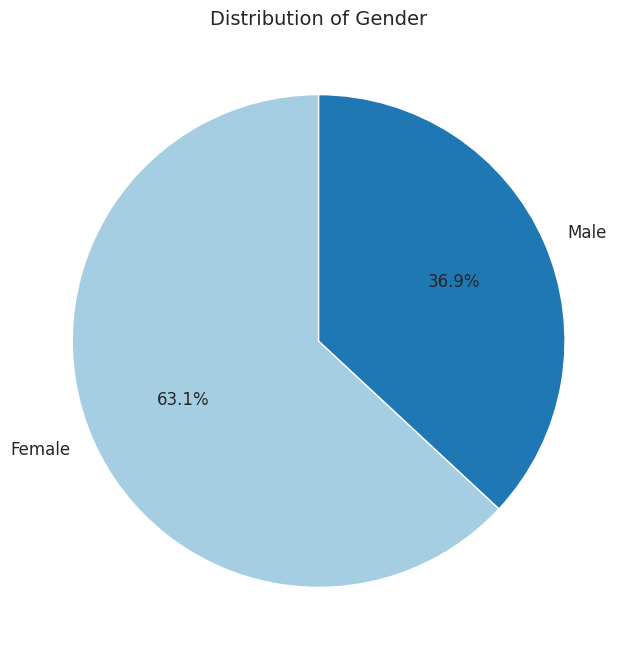

In [ ]:
import matplotlib.pyplot as plt

def plot_pie_chart(dataframe, column_name):
    # Get value counts for the specified column
    feature_data = dataframe[column_name].value_counts()

    # Define custom colors
    colors = plt.cm.Paired(range(len(feature_data)))

    # Create pie chart
    plt.figure(figsize=(8, 8))
    feature_data.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})

    # Add title
    plt.title(f'Distribution of {column_name}', fontsize=14)

    # Show plot
    plt.ylabel('')  # Remove y-axis label for cleaner display
    plt.show()

# Example usage for Gender
# Replace `df` with your DataFrame
plot_pie_chart(df, 'Gender')


In [ ]:
categorical_cols = ['Gender','Married','Value_Deal','Phone_Service', 'Multiple_Lines',
                        'Internet_Service', 'Internet_Type','Online_Security', 'Online_Backup',
                        'Device_Protection_Plan','Premium_Support', 'Streaming_TV', 'Streaming_Movies',
                        'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
                        'Payment_Method','Customer_Status', 'Churn_Category']

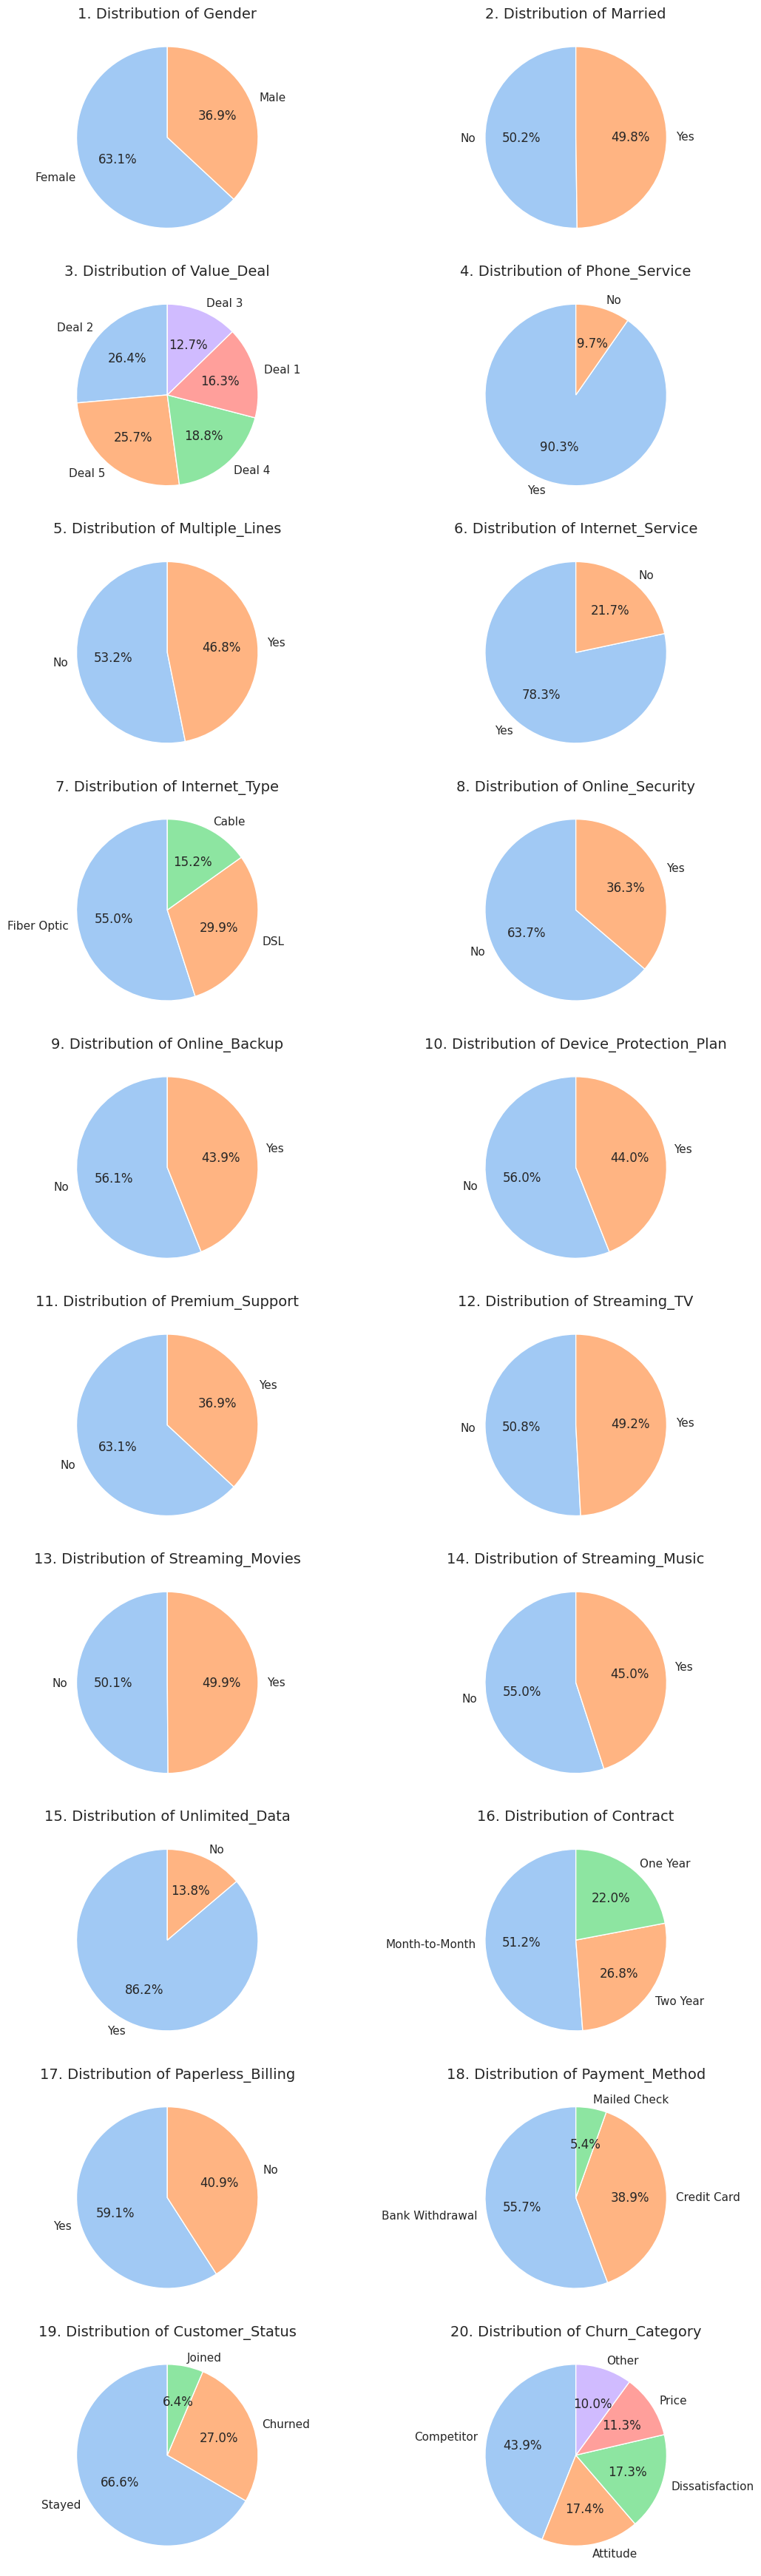

In [ ]:
plt.figure(figsize=(12, 35))
no = 1
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(10, 2, i)
    data = df[column].value_counts()
    plt.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel")
    )
    plt.title(f'{no}. Distribution of {column}', fontsize=14)
    no +=1
plt.tight_layout()
plt.show()

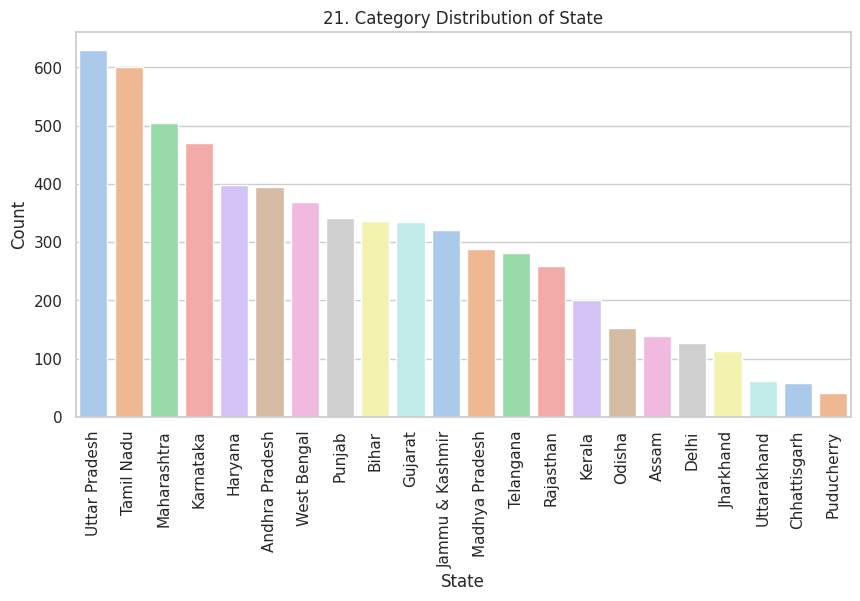

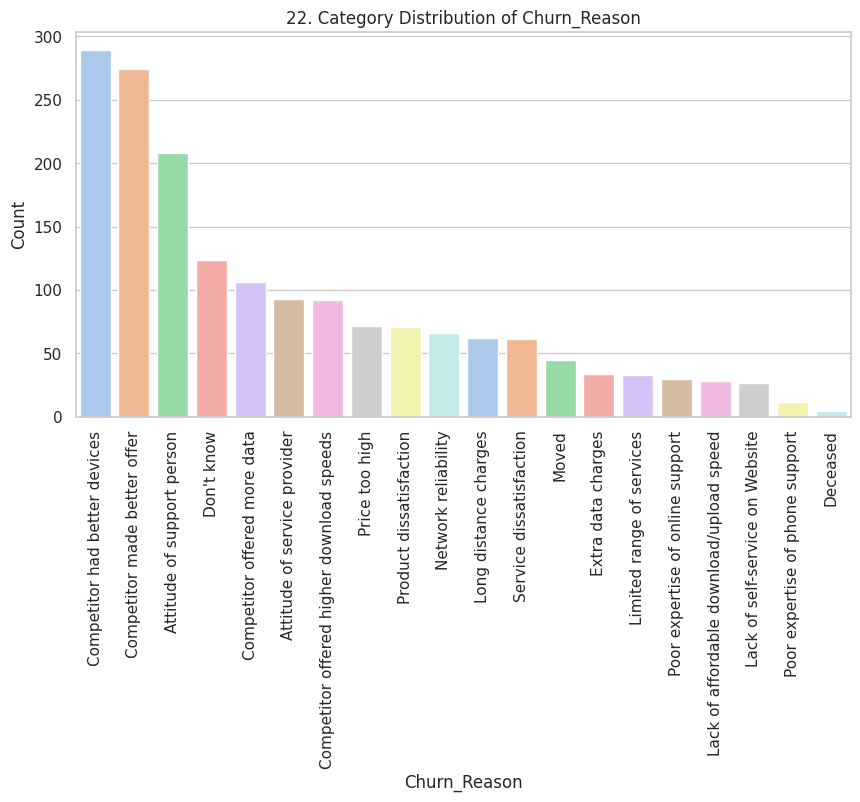

In [ ]:
cat_col = ['State','Churn_Reason']
num = 21
for col in cat_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'{num}. Category Distribution of {col}')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()
    num += 1

### **Insights**

---

#### 1. **Gender**  
- **Female**: 4048 customers (63%)  
- **Male**: 2370 customers (37%)  

**Observation:**  
- The majority of the customer base is female, which could influence marketing strategies.

---

#### 2. **Married**  
- **Yes**: 3195 customers (50%)  
- **No**: 3223 customers (50%)  

**Observation:**  
- The distribution between married and unmarried customers is nearly equal.

---

#### 3. **Value Deal**  
- **Most Popular Deal**: Deal 2 (758 customers).  
- **Least Popular Deal**: Deal 3 (365 customers).  

**Observation:**  
- Analyze why Deal 2 is preferred and consider promoting less popular deals.

---

#### 4. **Phone Service**  
- **Yes**: 5796 customers (90%)  
- **No**: 622 customers (10%)  

**Observation:**  
- Most customers use phone services; opportunities may lie in converting the 10% without it.

---

#### 5. **Multiple Lines**  
- **Yes**: 2714 customers (47%)  
- **No**: 3082 customers (53%)  

**Observation:**  
- A slight majority does not use multiple lines; explore the reasons and potential for bundling services.

---

#### 6. **Internet Service**  
- **Yes**: 5028 customers (78%)  
- **No**: 1390 customers (22%)  

**Observation:**  
- Internet service is widely adopted; retention strategies should focus on customers with internet services.

---

#### 7. **Internet Type**  
- **Fiber Optic**: 2764 customers (55%)  
- **DSL**: 1502 customers (30%)  
- **Cable**: 762 customers (15%)  

**Observation:**  
- Fiber Optic is the most popular choice, indicating a preference for high-speed internet.

---

#### 8. **Online Security**  
- **Yes**: 1824 customers (36%)  
- **No**: 3204 customers (64%)  

**Observation:**  
- A majority do not use online security; this could indicate a potential upselling opportunity.

---

#### 9. **Online Backup**  
- **Yes**: 2208 customers (44%)  
- **No**: 2820 customers (56%)  

**Observation:**  
- Online backup services can be better promoted to increase adoption.

---

#### 10. **Device Protection Plan**  
- **Yes**: 2211 customers (44%)  
- **No**: 2817 customers (56%)  

**Observation:**  
- There’s an opportunity to increase device protection plan subscriptions.

---

#### 11. **Premium Support**  
- **Yes**: 1856 customers (37%)  
- **No**: 3172 customers (63%)  

**Observation:**  
- Premium support adoption is relatively low, indicating potential for improvement.

---

#### 12. **Streaming TV**  
- **Yes**: 2472 customers (49%)  
- **No**: 2556 customers (51%)  

**Observation:**  
- Streaming TV adoption is balanced, suggesting room for growth.

---

#### 13. **Streaming Movies**  
- **Yes**: 2508 customers (49%)  
- **No**: 2520 customers (51%)  

**Observation:**  
- Streaming movies adoption is similar to streaming TV.

---

#### 14. **Streaming Music**  
- **Yes**: 2262 customers (44%)  
- **No**: 2766 customers (56%)  

**Observation:**  
- Streaming music has slightly lower adoption compared to TV and movies.

---

#### 15. **Unlimited Data**  
- **Yes**: 4334 customers (86%)  
- **No**: 694 customers (14%)  

**Observation:**  
- Most customers opt for unlimited data plans, indicating a strong preference.

---

#### 16. **Contract**  
- **Month-to-Month**: 3286 customers (51%)  
- **Two Year**: 1719 customers (27%)  
- **One Year**: 1413 customers (22%)  

**Observation:**  
- Month-to-month contracts dominate, which may indicate flexibility preference but could also correlate with higher churn.

---

#### 17. **Paperless Billing**  
- **Yes**: 3792 customers (59%)  
- **No**: 2626 customers (41%)  

**Observation:**  
- A majority prefer paperless billing; incentives could drive even higher adoption.

---

#### 18. **Payment Method**  
- **Bank Withdrawal**: 3575 customers (56%)  
- **Credit Card**: 2494 customers (39%)  
- **Mailed Check**: 349 customers (5%)  

**Observation:**  
- Bank withdrawal is the most popular payment method, while mailed checks are rarely used.

---

#### 19. **Customer Status**  
- **Stayed**: 4275 customers (67%)  
- **Churned**: 1732 customers (27%)  
- **Joined**: 411 customers (6%)  

**Observation:**  
- A significant portion of churned customers (27%) could be analyzed for insights on reducing churn.

---

#### 20. **Churn Category**  
- **Top Reason**: Competitor (761 customers, 44%).  
- **Other Reasons**: Attitude (301 customers), Dissatisfaction (300 customers), Price (196 customers).  

**Observation:**  
- Competitor churn dominates; focus on differentiation and pricing strategies.

---
#### 21. **State**  
- **Top 3 States by Customers**: Uttar Pradesh (629), Tamil Nadu (600), and Maharashtra (504).  
- **Least Represented States**: Chhattisgarh (59), Uttarakhand (62), and Jharkhand (113).  

**Observation:**  
- Focus can be on top-performing states for growth, while addressing challenges in states with fewer customers.

---
#### 22. **Churn Reason**  
- **Top 3 Reasons**:  
  - Competitor had better devices (289 customers).  
  - Competitor made a better offer (274 customers).  
  - Attitude of support person (208 customers).  

**Observation:**  
- Competitor-related issues and customer support attitudes are key churn drivers.

---
